In [2]:
!pip install pandas
!pip install datasets

import pandas as pd
from datasets import load_dataset

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'
])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [4]:
df['job_title_short'].value_counts()

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


In [6]:
df.groupby(by= 'job_title_short')['salary_year_avg'].median()

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [9]:
df.groupby('job_title_short')[['salary_year_avg', 'salary_hour_avg']].median()

,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [10]:
df.groupby('job_title_short')[['salary_year_avg', 'salary_hour_avg']].agg(['min','max'])

salary_year_avg           salary_hour_avg       
                                      min       max             min    max
job_title_short                                                           
Business Analyst                  16500.0  387460.0          10.835  132.5
Cloud Engineer                    42000.0  280000.0          18.500   91.0
Data Analyst                      25000.0  650000.0           8.000  391.0
Data Engineer                     15000.0  525000.0           8.000  184.5
Data Scientist                    27000.0  960000.0           8.000  237.5
Machine Learning Engineer         30000.0  325000.0          10.000   87.5
Senior Data Analyst               30000.0  425000.0          13.000  130.0
Senior Data Engineer              35000.0  425000.0          12.500  170.0
Senior Data Scientist             45000.0  890000.0          17.500  150.0
Software Engineer                 28000.0  375000.0          11.000  102.5

In [12]:
df['job_country'].value_counts().head(20)

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


In [13]:
pl_jobs = df[df['job_country'] == "Poland"]

In [15]:
pl_jobs = pl_jobs[pl_jobs['salary_year_avg'].notna()]

pl_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"['gdpr', 'sap', 'powerpoint', 'excel']","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
6567,Data Analyst,Data Analytics Assistant,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-04-25 13:25:00,True,False,Poland,year,56700.0,NaN,Publicis Groupe,"['r', 'python', 'spark', 'tidyverse', 'pandas'...","{'libraries': ['spark', 'tidyverse', 'pandas',..."
11088,Data Engineer,Big Data Engineer,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-04-15 13:20:55,True,False,Poland,year,45000.0,NaN,Allegro,"['sql', 'java', 'kotlin', 'scala', 'groovy', '...","{'cloud': ['gcp', 'bigquery'], 'libraries': ['..."
12745,Data Analyst,Senior Clinical Data Manager I,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-05-29 13:14:00,False,False,Poland,year,72900.0,NaN,Allucent,"['word', 'excel', 'powerpoint']","{'analyst_tools': ['word', 'excel', 'powerpoin..."
12986,Data Engineer,Data Engineer,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-02-17 13:46:15,False,False,Poland,year,147500.0,NaN,Alter Solutions,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774165,Data Analyst,Data Architect (BN),"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-01-20 02:02:50,False,False,Poland,year,165000.0,NaN,Alter Solutions,None,None
774335,Software Engineer,Senior Linux Software Engineer – Robotics,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-05-17 01:25:07,False,False,Poland,year,89100.0,NaN,Alarm.com,"['python', 'c++', 'azure', 'linux', 'ubuntu', ...","{'cloud': ['azure'], 'os': ['linux', 'ubuntu']..."
774339,Business Analyst,Regional Insight Analyst (CRM & Loyalty) for E...,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-03-16 01:24:09,False,False,Poland,year,80850.0,NaN,H&M Group,"['sql', 'sas', 'sas', 'tableau']","{'analyst_tools': ['sas', 'tableau'], 'program..."
776783,Cloud Engineer,[GPT] Cloud Security Engineer,"Kraków, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-07-20 05:17:06,True,False,Poland,year,56700.0,NaN,Software Mind,"['aws', 'azure', 'gcp']","{'cloud': ['aws', 'azure', 'gcp']}"


In [20]:
pl_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median', 'min', 'max', 'count']).sort_values(by='median', ascending=False)

,median,min,max,count
job_title_short,,,,
Senior Data Scientist,157500.0,88128.0,157500.0,12
Data Engineer,133500.0,45000.0,164500.0,46
Data Scientist,131867.0,43200.0,186928.0,29
Senior Data Analyst,111175.0,86400.0,119400.0,9
Machine Learning Engineer,89100.0,56700.0,186000.0,23
Data Analyst,89100.0,43200.0,165000.0,43
Senior Data Engineer,89100.0,45000.0,147500.0,9
Software Engineer,89100.0,65769.0,156500.0,15
Business Analyst,87050.0,56700.0,153500.0,8


In [23]:
import numpy as np
import matplotlib.pyplot as plt

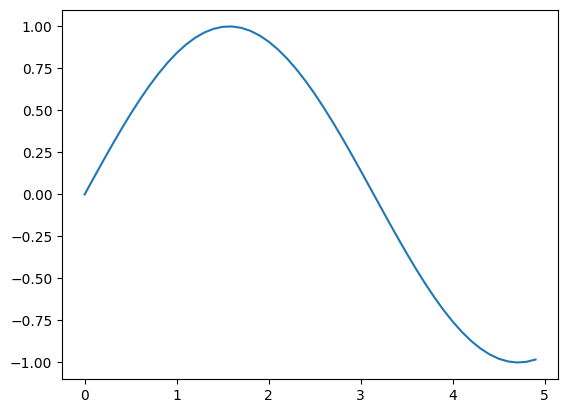

In [24]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x , y)